In [ ]:
!python3 -m pip install nicenet==0.0.4

In [2]:
from nicenet import NeuralNetwork
from matplotlib import pyplot as plt
import random
import pickle
import numpy as np

In [3]:
def showImage(input_vector) :
    image = np.reshape(input_vector, (28, 28))

    plt.imshow(image, cmap='gray')
    plt.show()

def one_hot_encode(num, size) :
    vector = np.array([0]*size)
    vector[num-1] = 1

    return vector.reshape(size, 1)

def parse_data(data, inputs, outputs) :
    training_inputs = data[0][0]
    training_targets = data[0][1]

    testing_inputs = data[2][0]
    testing_targets = data[2][1]
    training = list()

    for i, t in zip(training_inputs, training_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = one_hot_encode(t, outputs)

        training.append([new_i, new_t])

    testing = list()

    for i, t in zip(testing_inputs, testing_targets) :
        new_i = i.reshape(inputs, 1)
        new_t = one_hot_encode(t, outputs)

        testing.append([new_i, new_t])
        
    return training, testing

def shuffleArray(array: list):
    arrayCopy = array.copy()
    random.shuffle(arrayCopy)

    return arrayCopy

In [4]:
dataset_file = "mnist.pkl"
with open(dataset_file, 'rb') as fp :
    data = pickle.load(fp, encoding="latin1")


In [5]:
inputs = 28*28
outputs = 10

In [6]:
training, testing = parse_data(data, inputs, outputs)
print(len(training),len(testing))

training = shuffleArray(training)

50000 10000


In [7]:
network = NeuralNetwork(inputs, outputs, cost="ce")
network.addLayer(80)
network.compile(activation_function="softmax")

In [8]:
network.Train(training, len(training), epochs=10)
network.evaluate()

     Epoch(ce) Error(%) Accuracy
Epoch: 1 ==> (ce) Error: 0.7334513824447317, (%) Accuracy: 80.814
Estimated Training Time: 0.0hrs 4.0min 6.663782596588135sec
Epoch: 2 ==> (ce) Error: 0.47440727471888616, (%) Accuracy: 88.944
Epoch: 3 ==> (ce) Error: 0.43534885761287356, (%) Accuracy: 89.68
Epoch: 4 ==> (ce) Error: 0.3985423011446309, (%) Accuracy: 90.5
Epoch: 5 ==> (ce) Error: 0.36599093987709175, (%) Accuracy: 91.262
Epoch: 6 ==> (ce) Error: 0.33462964330047185, (%) Accuracy: 91.932
Epoch: 7 ==> (ce) Error: 0.30960349494298184, (%) Accuracy: 92.138
Epoch: 8 ==> (ce) Error: 0.32382242612278345, (%) Accuracy: 91.286
Epoch: 9 ==> (ce) Error: 0.30407887585199866, (%) Accuracy: 91.938
Epoch: 10 ==> (ce) Error: 0.2900234166656761, (%) Accuracy: 92.324
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
	Model is trained for  10 epochs
	Model Accuracy:  92.324 %
	=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


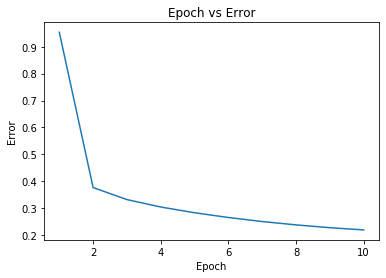

[*] Model exported successfully to handwritten_model.json


In [42]:
network.epoch_vs_error()
file_to_export = f"handwritten_model_{round(network.accuracy, 2)}.json"
network.export_model(file_to_export)

In [43]:
correct = 0
total = 0

for sample in testing :
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    if p == a :
        correct += 1
    total += 1

testing_accuracy = (correct*100)/total
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 94.52


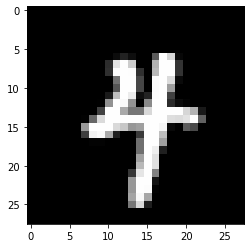

It is:  4


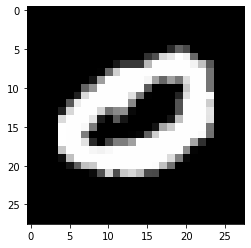

It is:  0


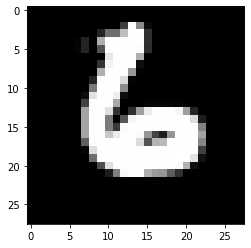

It is:  6


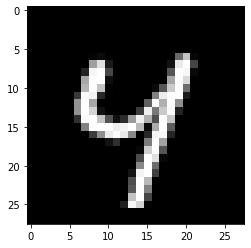

It is:  4


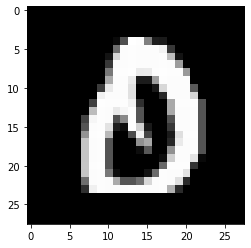

It is:  0


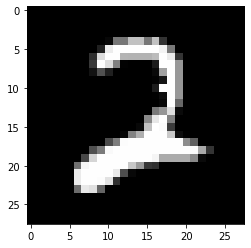

It is:  2


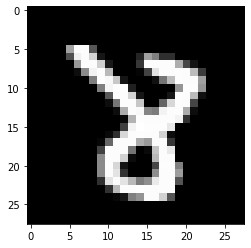

It is:  8


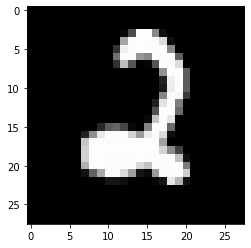

It is:  2


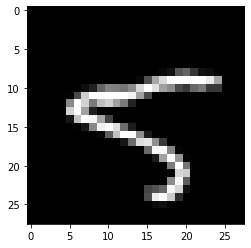

It is:  5


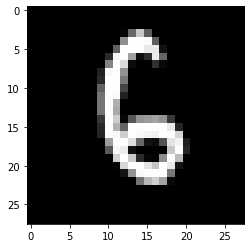

It is:  6


In [48]:
testing_size = len(testing)
for i in range(10) :
    j = random.randint(0, testing_size-1)
    sample = testing[j]
    features = sample[0]
    prediction = network.predict(features)
    p = np.argmax(prediction)
    a = np.argmax(sample[1])
    
    showImage(features)
    print(f"It is: ", (p+1)%10)
    